C:\Users\Minseok\AppData\Local\Temp\ipykernel_44264\762120169.py:46: UserWarning: frames=<generator object bubble_sort at 0x0000016D038EF4C0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)


C:\Users\Minseok\anaconda3\Lib\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


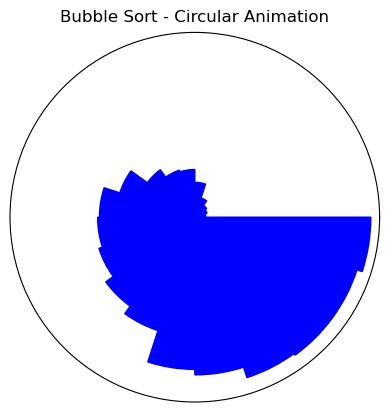

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import random
from IPython.display import HTML

# 무작위 데이터 생성
def generate_data(n=20, max_val=100):
    return [random.randint(1, max_val) for _ in range(n)]

def bubble_sort(data):
    n = len(data)
    for i in range(n - 1):
        for j in range(n - i - 1):
            yield data, j, j + 1, i  # 현재 비교 상태
            if data[j] > data[j + 1]:
                data[j], data[j + 1] = data[j + 1], data[j]  # 스왑
                yield data, j, j + 1, i  # 스왑 후 상태
    yield data, -1, -1, -1  # 정렬 완료


# 데이터 초기화
data = generate_data()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
angles = np.linspace(0, 2 * np.pi, len(data), endpoint=False)
bars = ax.bar(angles, data, width=2 * np.pi / len(data), align='edge', color='limegreen')
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Bubble Sort - Circular Animation", va='bottom')

def update(frame):
    current_data, idx1, idx2, i = frame
    for idx, (bar, value) in enumerate(zip(bars, current_data)):
        bar.set_height(value)
        if idx < len(data) - i - 1:  # 정렬된 부분
            bar.set_color("blue")
        elif idx == idx1:  # 현재 비교 중인 막대
            bar.set_color("red")
        elif idx == idx2:  # 비교 대상 막대
            bar.set_color("yellow")
        else:
            bar.set_color("limegreen")

generator = bubble_sort(data[:])
ani = FuncAnimation(fig, update, frames=generator, interval=300, repeat=False)
HTML(ani.to_html5_video())
